# Use MATLAB in Jupyter Notebooks

[Jupyter Notebook](http://jupyter.org) is a great tool for interactive computing. It allows you to combine codes, simulation results, and descriptions such as latex equations in a single file. It works for [many languages](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels) including MATLAB, the choice of this class.

For installation, see [Install Jupyter-MATLAB](./jmatlab_install.ipynb).

## Jupyter basics

The most commonly used Jupyter commands are

- enter -- (in command mode) enter edit mode
- shift+enter -- (in edit mode) execute current cell
- esc -- (in edit mode) enter command mode, so you can use arrow keys to move to other cells
- b -- (in command mode) insert empty cell below
- x -- (in command mode) cut current cell
- v -- (in command mode) paste the cell you've cut
- esc+m/y -- change current code cell to markdown cell / reverse

For all commands see "Help" - "Keyboard shortcuts" in the toolbar.

## Printing formats

The default output format is "loose", which takes a lot of space.

In [1]:
format loose
for i=1:2
    i+1
end


ans =

     2


ans =

     3



"compact" is a better option for notebook.

In [2]:
format compact
for i=1:2
    i+1
end

ans =
     2
ans =
     3


## Use help functions

"help" will print docs inside the notebook, same as Python's help( )

In [3]:
help sin

 SIN    Sine of argument in radians.
    SIN(X) is the sine of the elements of X.
 
    See also ASIN, SIND.

    Reference page in Doc Center
       doc sin

    Other functions named sin

       codistributed/sin    gpuArray/sin    sym/sin



"?" will prompt a small text window, same as IPython magic "?". (not shown on the webpage)

In [4]:
?sin

"doc" will prompt MATLAB's detailed documentations. (not shown on the webpage)

In [5]:
doc sin

## Plotting

Make a cool surface for plotting :)

In [6]:
tx = linspace (-8, 8, 41);
ty = tx;
[xx, yy] = meshgrid (tx, ty);
r = sqrt (xx .^ 2 + yy .^ 2) + eps;
tz = sin (r) ./ r;

The "%plot inline" magic (default) will plot inside the notebook, same as "%matplotlib inline" in IPython.

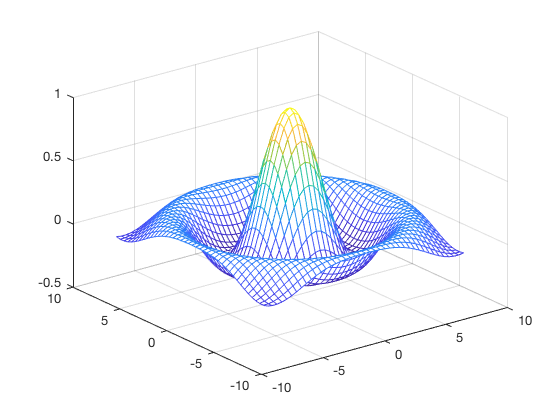

In [7]:
%plot inline
mesh(tx, ty, tz);

The "%plot native" magic will plot in an external window as the original MATLAB's interface, which allows you to rotate, zoom in/out (not shown on the webpage).

In [8]:
%plot native
mesh(tx, ty, tz);

You can still use "close all" to close the window that was opened by cell above.

In [9]:
close all

"?%plot" will show more plotting options including how to control the figure size (not shown on the webpage)

In [10]:
?%plot

## User-defined functions

For Python programmers it is so common to define a custom function inside a notebook and reuse it over and over again. 

A ridiculous design of MATLAB is the function has to be in a separate file, with the function name being the file name. [Local functions are allowed since R2016b](https://www.mathworks.com/help/matlab/matlab_prog/local-functions-in-scripts.html), but it has many restrictions and doesn't work in either Jupyter Notebook or MATLAB's own Live Script.

### Inline functions

By default, matlab only allows **inline functions** within a script. 

In [11]:
f=@(x) x^3+x-1;

We can easily find the root of such a function.

In [12]:
fzero(f,[0 1],optimset('Display','iter'))

 
 Func-count    x          f(x)             Procedure
    2               1             1        initial
    3             0.5        -0.375        bisection
    4        0.636364     -0.105935        interpolation
    5         0.68491    0.00620153        interpolation
    6        0.682225  -0.000246683        interpolation
    7        0.682328  -5.43508e-07        interpolation
    8        0.682328   1.50102e-13        interpolation
    9        0.682328             0        interpolation
 
Zero found in the interval [0, 1]
ans =
    0.6823


### Standard functions

But inline functions must only contain a single statement, too limited in most cases.

If you try to define a standard function, it will fail:

In [13]:
function p = multi_line_func(a,b)
    a = a+1;
    b = b+1;
    p = a+b;
end

Error: Function definitions are not permitted in this context.


Fortunately, Jupyter's "%%file" magic allows us to write a code cell to a file.

In [14]:
%%file multi_line_func.m

function p = multi_line_func(a,b)
    % in-file comments can be added like this
    a = a+1;
    b = b+1;
    p = a+b;
end

Created file '/Users/zhuangjw/Research/Computing/personal_web/matlab_code/multi_line_func.m'.


The output file and this Notebook will be in the same directory, so you can call it directly, as if this function is defined inside the notebook.

In [15]:
multi_line_func(1,1)

ans =
     4


By doing this, you get Python-like working environment -- create a function, test it with several input parameters, go back to edit the function and test it again. This [REPL](https://en.wikipedia.org/wiki/Read–eval–print_loop) workflow will greatly speed-up your prototyping.

It might take 1~2 seconds for a function cell to take effect, because we are writting files to disk. But you **don't** need to restart the kernel to activate any modifications to your function.

**warning:** you should avoid adding a MATLAB comment (start with %) at the beginning of a cell, because it might be interpreted as Jupyter magic and thus confuse the kernel.

## Markdown cells

Markdown cells are a great way to add descriptions to your codes. Here are examples stolen from the official document. See [Jupyter notebook's document](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html) for details.

### Latex equations

How to write an inline eqution: `$e^{i\pi} + 1 = 0$`

Result: $e^{i\pi} + 1 = 0$



How to write a standalone equation:

`$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$`

Result: 
$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

### Tables

How to make a table:

    | This | is   |
    |------|------|
    |   a  | table|

Result:

| This | is   |
|------|------|
|   a  | table|

### Not-executing codes

You can put your codes inside a markdown cell, to only show the codes without executing them. 

Here's the way to get syntax highlighting for python codes:

    ```python
    python codes
    ```

"MATLAB" is not a  highlighting option, but you can use "OCTAVE", an open-source clone of MATLAB, to get the same effect.

    ```OCTAVE
    disp("Hello World")
    for i=1:2
     i+1
    end
    ```

Result:
```OCTAVE
disp("Hello World")
for i=1:2
    i+1
end
```

### Headings

Headings are an important way to structure your notebook.

    # Heading 1 
    ## Heading 2
    ### Heading 3
    #### Heading 4